In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
url='https://bit.ly/2Uk7oH5'

tweets= pd.read_csv(url)

In [3]:
tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [5]:
tweets['date']= pd.to_datetime(tweets['created_at'])
tweets["date"].min(), tweets['date'].max()

(Timestamp('2016-03-09 12:22:10'), Timestamp('2017-01-31 11:00:07'))

In [7]:
tweets.index= tweets['date'] # can be used to group rows according to time

In [8]:
tweets.resample('1M').size() # monthwise no. of tweets, 1M means one month

date
2016-03-31    157
2016-04-30    201
2016-05-31    307
2016-06-30    413
2016-07-31    303
2016-08-31    383
2016-09-30    292
2016-10-31    393
2016-11-30    255
2016-12-31    260
2017-01-31    256
Freq: M, dtype: int64

In [10]:
tweets.resample('1D').size().sort_values(ascending = False)

date
2016-06-21    101
2016-09-17     97
2016-07-04     74
2016-08-28     49
2016-10-02     48
2016-08-22     39
2016-10-26     32
2016-10-15     32
2016-10-28     31
2016-10-27     30
2016-11-09     29
2017-01-23     29
2016-10-25     29
2016-08-07     28
2016-08-20     26
2016-07-09     26
2016-12-25     25
2016-12-24     25
2016-06-10     24
2017-01-31     24
2016-06-04     23
2016-08-15     22
2016-06-08     22
2016-10-30     22
2016-05-19     21
2017-01-09     21
2016-05-23     21
2016-08-18     21
2016-07-11     21
2016-10-31     21
             ... 
2016-03-09      1
2016-08-27      1
2016-09-23      1
2016-09-12      1
2016-05-09      1
2016-07-18      1
2016-10-08      1
2016-10-07      1
2016-04-23      1
2016-04-09      1
2016-04-30      1
2016-03-16      0
2017-01-16      0
2016-08-14      0
2016-12-21      0
2016-03-13      0
2016-07-17      0
2017-01-06      0
2016-07-29      0
2016-09-19      0
2017-01-22      0
2016-09-09      0
2016-09-20      0
2016-09-29      0
2016-

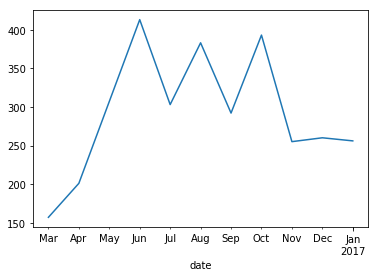

In [11]:
%matplotlib inline

tweets.resample('1M').size().plot.line()

In [ ]:
#hastags

In [16]:
hashtags= []

for tweet in tweets['text'].str.replace('[^a-zA-Z0-9 #@]',''):
    words=tweet.split(' ')
    for word in words:
        if word.startswith('#'):
            hashtags.append(word)

In [17]:
hashtags_freq= pd.Series(hashtags).value_counts()
hashtags_freq

#Sandesh2Soldiers                       108
#MannKiBaat                              90
#TirangaYatra                            79
#TransformingIndia                       52
#YogaDay                                 52
#IDY2016                                 43
#MyCleanIndia                            24
#Rio2016                                 18
#                                        14
#DigiDhanMela                             9
#PresidentMukherjee                       9
#IYD2016                                  9
#Paralympics                              9
#SwachhBharat                             8
#Diwali                                   8
#Yoga                                     7
#InternationalYogaDay                     6
#RepublicDay                              5
#HappyDiwali                              5
#SwachhBharatAbhiyan                      4
#Yoga4SDGs                                4
#ShivSmarak                               4
#GandhiJayanti                  

In [18]:
tweets['#MannKiBaat']= tweets['text'].str.replace('[^a-zA-Z0-9 #@]','').apply(lambda v: 1 if '#MannKiBaat' in v else 0)
tweets['#MannKiBaat'].value_counts()

0    3127
1      93
Name: #MannKiBaat, dtype: int64

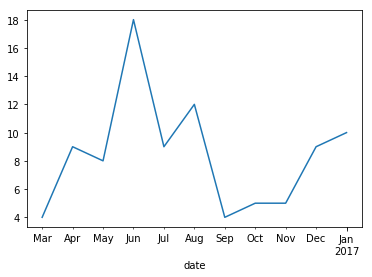

In [19]:
tweets.resample('1M')['#MannKiBaat'].sum().plot.line()

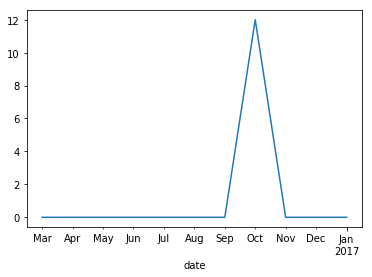

In [20]:
tweets['#SwachhBharat']= tweets['text'].str.replace('[^a-zA-Z0-9 #@]','').apply(lambda v: 1 if '#SwachhBharat' in v else 0)
tweets.resample('1M')['#SwachhBharat'].sum().plot.line()

In [21]:
!pip install wordcloud

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud().generate(''.join(tweets['text']))


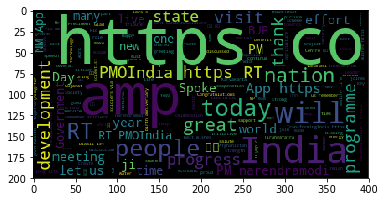

In [25]:
plt.imshow(wc)

In [26]:
import nltk

In [27]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
docs= tweets['text'].fillna('').str.lower().str.replace("[^a-zA-Z0-9, #@ ]", "")

stopwords= nltk.corpus.stopwords.words('english')

def clean_sentence(text):
    words=text.split(' ')
    words_clean=[word for word in words if word not in stopwords]
    return ' '.join(words_clean)

docs_clean= docs.apply(clean_sentence)
docs_clean.head()

date
2017-01-31 11:00:07    presidents address wonderfully encapsulated in...
2017-01-31 10:59:12    rashtrapati jis address houses parliament inde...
2017-01-31 10:52:33    rt @pmoindia empowering marginalised httpstcow...
2017-01-31 10:52:22    rt @pmoindia commitment welfare farmers httpst...
2017-01-31 10:52:16    rt @pmoindia improving quality life poor https...
Name: text, dtype: object

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=5)
vectorizer.fit(docs_clean)
dtm_sparse=vectorizer.transform(docs_clean)

df_dtm= pd.DataFrame(dtm_sparse.toarray(), columns= vectorizer.get_feature_names())
df_dtm.head()

,000,10,1000,11,125,18,1800117800,1st,20,2016,...,yesterday,yoga,yogaday,yogrishiramdev,yojana,you,young,youngsters,youth,zayed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.cluster import KMeans


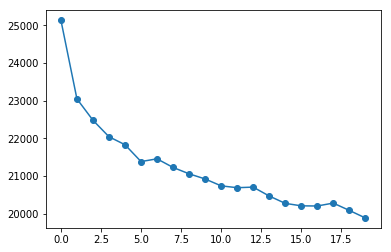

In [55]:
k = []
for i in list(range(1,21)):
    model = KMeans(n_clusters =i, max_iter=50)
    model.fit(df_dtm.T)
    k.append(model.inertia_)
plt.plot(k, '-o')

In [115]:
model_cluster_10 = KMeans(n_clusters=15, max_iter=50)
model_cluster_10.fit(df_dtm.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [116]:
tweets.index = pd.RangeIndex(len(tweets.index))


In [117]:
tweets.columns

Index(['id', 'retweets_count', 'favorite_count', 'created_at', 'text', 'lang',
       'retweeted', 'followers_count', 'friends_count', 'hashtags_count',
       'description', 'location', 'background_image_url', 'source', 'date',
       '#MannKiBaat', '#SwachhBharat'],
      dtype='object')

In [118]:
tweets_cluster = pd.concat([tweets, pd.Series(model_cluster_10.labels_)], axis=1)
tweets_cluster.columns = ['id', 'retweets_count', 'favorite_count', 'created_at', 'text', 'lang',
       'retweeted', 'followers_count', 'friends_count', 'hashtags_count',
       'description', 'location', 'background_image_url', 'source', 'date',
       '#MannKiBaat', '#SwachhBharat', 'Cluster_id']

In [114]:
tweets_cluster.shape

(3220, 18)

In [119]:
group = tweets_cluster.groupby('Cluster_id')
g1 = group.get_group(0)
g2 = group.get_group(1)
g3 = group.get_group(2)
g4 = group.get_group(3)
g5 = group.get_group(4)
g6 = group.get_group(5)
g7 = group.get_group(6)
g8 = group.get_group(7)
g9 = group.get_group(8)
g10 = group.get_group(9)
g11 = group.get_group(10)
g12 = group.get_group(11)
g13 = group.get_group(12)
g14 = group.get_group(13)
g15 = group.get_group(14)


In [120]:
len(g1)

1296

In [121]:
len(g2)

1

In [122]:
len(g3)

1

In [123]:
len(g4) , len(g5),len(g6), len(g7),len(g8), len(g9)

(1, 1, 1, 1, 1, 3)

In [124]:
len(g10) , len(g11),len(g12), len(g13),len(g14)

(1, 11, 1, 10, 13)